# Learning from data and related challenges and classification

In [739]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Linear Regression and the effect of outliers

In [740]:
np.random.seed(42)
n_inliers = 50
x_inliers = np.linspace(0, 10, n_inliers)

# y = 2*x + 1 + noise
y_inliers = 2 * x_inliers + 1 + np.random.normal(0, 0.5, n_inliers)

#Generate a few outliers
n_outliers = 3
x_outliers = np.array([2, 5, 9])
y_outliers = np.array([-5, 20, -4])

#Combine into the full dataset. Last 3 elements are the outliers
X = np.concatenate([x_inliers, x_outliers]).reshape(-1, 1)
y = np.concatenate([y_inliers, y_outliers])

#Create the sample weights array for each scheme
# First 50 points are inliers (weight=1), last 3 are outliers
weights_scheme1 = np.ones(len(X))
weights_scheme1[-n_outliers:] = 0.01  # Downweight outliers

weights_scheme2 = np.ones(len(X))
weights_scheme2[-n_outliers:] = 5      # Overweight outliers

#Fit the models
#Standard OLS
model_ols = LinearRegression()
model_ols.fit(X, y)

#Scheme 1
model_scheme1 = LinearRegression()
model_scheme1.fit(X, y, sample_weight=weights_scheme1)

#Scheme 2
model_scheme2 = LinearRegression()
model_scheme2.fit(X, y, sample_weight=weights_scheme2)

#create x axis for plotting the models
x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_plot_ols = model_ols.predict(x_plot)
y_plot_scheme1 = model_scheme1.predict(x_plot)
y_plot_scheme2 = model_scheme2.predict(x_plot)

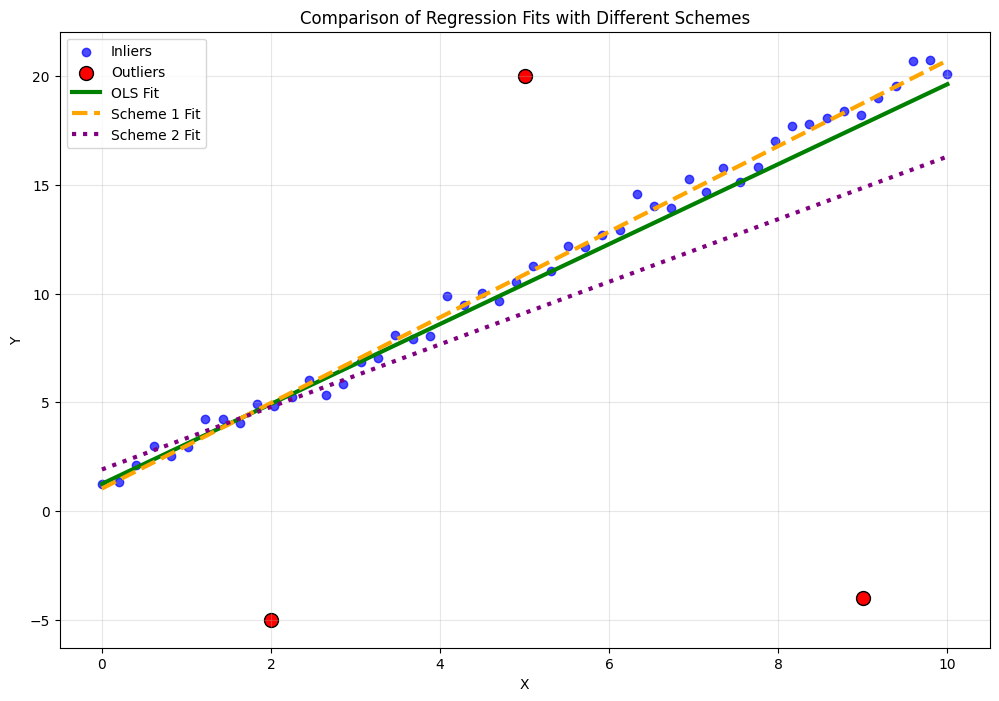

Model Coefficients (Intercept, Slope):
OLS:            (1.25, 1.84)
Scheme 1 (Good): (1.03, 1.97)
Scheme 2 (Bad):  (1.91, 1.44)


In [741]:
# Plot the results
plt.figure(figsize=(12, 8))

# Plot the inliers and outliers
plt.scatter(x_inliers, y_inliers, color='blue', label='Inliers', alpha=0.7)
plt.scatter(x_outliers, y_outliers, color='red', s=100, label='Outliers', edgecolors='black')

# Plot the regression lines
plt.plot(x_plot, y_plot_ols, color='green', linewidth=3, label='OLS Fit')
plt.plot(x_plot, y_plot_scheme1, color='orange', linewidth=3, linestyle='--', label='Scheme 1 Fit')
plt.plot(x_plot, y_plot_scheme2, color='purple', linewidth=3, linestyle=':', label='Scheme 2 Fit')

plt.title('Comparison of Regression Fits with Different Schemes')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Model Coefficients (Intercept, Slope):")
print(f"OLS:            ({model_ols.intercept_:.2f}, {model_ols.coef_[0]:.2f})")
print(f"Scheme 1 (Good): ({model_scheme1.intercept_:.2f}, {model_scheme1.coef_[0]:.2f})")
print(f"Scheme 2 (Bad):  ({model_scheme2.intercept_:.2f}, {model_scheme2.coef_[0]:.2f})")

## Logistic Regression

In [742]:
import seaborn as sns
import pandas as pd
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import LabelEncoder
from sklearn . linear_model import LogisticRegression
from sklearn . metrics import accuracy_score

In [743]:
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)



       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [744]:
print(X)


       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
215  Chinstrap      Dream            55.8           19.8              207.0   
216  Chinstrap      Dream            43.5           18.1              202.0   
217  Chinstrap      Dream            49.6           18.2              193.0   
218  Chinstrap      Dream            50.8           19.0              210.0   
219  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  
0         3750.0    Male

### Using saga solver with different random state values

In [745]:
#drop species column
X = X.drop(['species'], axis=1)

#encode the categorical colums using One-Hot encoding
X = pd.get_dummies(X, columns=['island', 'sex'])

random_state_vals = [10,20,30,42,50,60,70]
for rs in random_state_vals:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

    # Train the logistic regression model. Here we are using saga solver to learn weights.
    logreg = LogisticRegression(solver='saga')
    logreg.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}        random state value: {rs}")
    print(logreg.coef_, logreg.intercept_)
    print()


Accuracy: 0.6976744186046512        random state value: 10
[[ 3.19497846e-03 -7.24131544e-05  1.19401501e-03 -2.97551173e-04
  -9.39726199e-05  1.95546312e-04 -1.04861499e-04 -6.24957760e-06
   2.96177130e-06]] [-3.28781972e-06]

Accuracy: 0.627906976744186        random state value: 20
[[ 2.85011819e-03 -1.31371898e-04  3.09402028e-04 -2.62488247e-04
  -8.90449462e-05  1.87734229e-04 -1.08639871e-04 -2.26860364e-05
   1.27354479e-05]] [-9.95063189e-06]

Accuracy: 0.6744186046511628        random state value: 30
[[ 3.13826904e-03 -4.95505047e-05  1.17400435e-03 -3.00205230e-04
  -9.25639712e-05  1.92178354e-04 -1.03631612e-04 -1.70643069e-05
   1.30470774e-05]] [-4.01724647e-06]

Accuracy: 0.5813953488372093        random state value: 42
[[ 2.75609471e-03 -8.23102873e-05  4.75149885e-04 -2.87160116e-04
  -8.86785301e-05  1.84944578e-04 -1.04694493e-04 -1.85376117e-05
   1.01091667e-05]] [-8.42848121e-06]

Accuracy: 0.7674418604651163        random state value: 50
[[ 3.05529827e-03 -1.0

d:\venv\compVision\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\venv\compVision\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\venv\compVision\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\venv\compVision\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\venv\compVision\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\venv\compVision\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ di

### Using liblinear solver

In [746]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.49676343 -1.38121095 -0.1435575  -0.00353557 -0.23127486  0.72387861
  -0.57084769  0.1303921  -0.20863605]] [-0.07824394]


### Logistic regresssion with feature scaling

In [747]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

random_state_vals = [10,20,30,42,50,60,70]
for rs in random_state_vals:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

    #scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the logistic regression model. Here we are using saga solver to learn weights.
    logreg = LogisticRegression(solver='saga')
    logreg.fit(X_train_scaled, y_train)

    # Predict on the testing data
    y_pred = logreg.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}        random state value: {rs}")
    print(logreg.coef_, logreg.intercept_)
    print()

Accuracy: 1.0        random state value: 10
[[ 3.43987734 -0.57144326  0.43043397 -0.40348266 -0.45489502  0.86741243
  -0.59984691  0.46510701 -0.46510701]] [-2.29978478]

Accuracy: 1.0        random state value: 20
[[ 3.36597164 -0.41429405  0.44539521 -0.24671521 -0.36848432  0.85458601
  -0.65501971  0.49738649 -0.49738649]] [-2.50893234]

Accuracy: 0.9767441860465116        random state value: 30
[[ 3.41950719 -0.47226229  0.57662858 -0.50476074 -0.40534909  0.8524272
  -0.62943684  0.48143853 -0.48143853]] [-2.34483569]

Accuracy: 1.0        random state value: 42
[[ 3.3394185  -0.42444243  0.45868914 -0.29610856 -0.44263423  0.89167189
  -0.62628753  0.5352215  -0.5352215 ]] [-2.57333491]

Accuracy: 1.0        random state value: 50
[[ 3.46694884 -0.47930744  0.4196324  -0.33168718 -0.48386059  0.88190859
  -0.60326942  0.52573396 -0.52573396]] [-2.05178922]

Accuracy: 1.0        random state value: 60
[[ 3.31714155 -0.3616647   0.46972869 -0.33946006 -0.47073203  0.95673766
  -

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 3.26974452 -0.3637722   0.40189087 -0.29907748 -0.3029009   0.67927884
  -0.50944667  0.48969306 -0.48969306]] [-1.96200479]


# Logistic regression First/Second-Order Methods

In [749]:
from sklearn . datasets import make_blobs
# Generate synthetic data
np . random . seed (0)
centers = [[ -5 , 0] , [5 , 1.5]]

#make blobs around the centers. X is 2000x2 matrix and y is a 2000, matrix. y is 0 or 1 depending on the center
X , y = make_blobs ( n_samples =2000 , centers = centers , random_state =5)

#transform X using the following matrix
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np.dot(X , transformation )

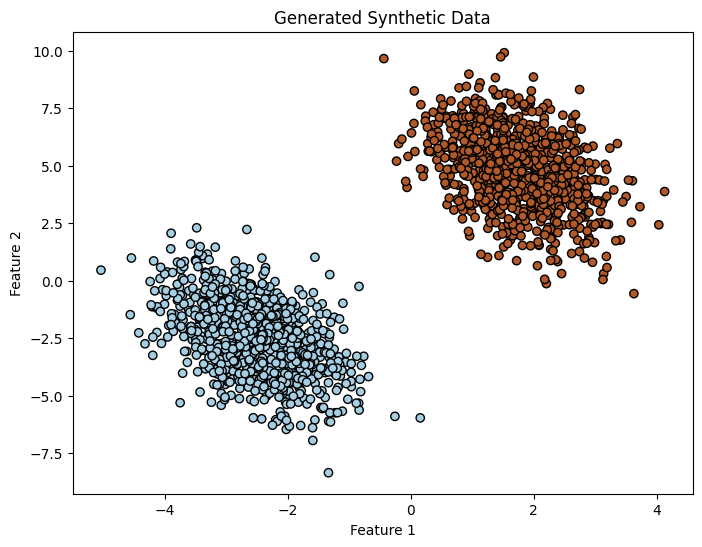

In [750]:
# Let's visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Generated Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Implementing batch gradient descent

In [751]:
def sigmoid(z):
    #define the sigmoid function
    return 1 / (1 + np.exp(-z))

def loss_calc(y, y_hat):
    # Binary Cross-Entropy Loss
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Add a column of ones to X (bias term)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X_b is now [1, feature1, feature2] with 2000 rows (2000x3 matrix)

n_in = X_b.shape[1]  # Number of input features (including the bias term!)
limit = np.sqrt(6 / (n_in + 1)) # n_out is 1 for logistic regression

# Initialize weights from the Xavier Uniform distribution
w_ini = np.random.uniform(-limit, limit, size=(n_in, 1))
w_grad = w_ini      #this is a 3x1 matrix

 #make y a column vector
y = y.reshape(-1, 1)

learning_rate = 0.1
iterations = 20

# store the loss for plotting
loss_history_gradient = []

# Implement Batch Gradient Descent
for i in range(iterations):
    z = np.dot(X_b, w_grad)
    y_hat = sigmoid(z)      #this is a 2000x1 matrix
    
    # store the loss
    loss = loss_calc(y, y_hat)
    loss_history_gradient.append(loss)
    
    # Compute the gradients and update w
    gradient = np.dot(X_b.T, (y_hat - y)) / len(y)
    w_grad = w_grad - learning_rate * gradient

print("Final GD weights:\n", w_grad.ravel())

Final GD weights:
 [0.08534997 0.78405749 0.5748131 ]


### Implementing Newton's Method

In [752]:
w_newton = w_ini
#print(w_newton)

loss_history_newton = []

# Newton's Method
for i in range(iterations):

    z = np.dot(X_b, w_newton)
    y_hat = sigmoid(z)
    

    loss = loss_calc(y, y_hat)
    loss_history_newton.append(loss)
    
    # Compute the gradient
    gradient = np.dot(X_b.T, (y_hat - y)) / len(y)
    
    # Compute the Hessian matrix
    R = np.diagflat(y_hat * (1 - y_hat))        # R is a diagonal matrix
    hessian = np.dot(X_b.T, np.dot(R, X_b)) / len(y)
    
    # Update the weights: w = w - H^{-1} * gradient
    w_newton = w_newton - np.dot(np.linalg.inv(hessian), gradient)

print("Final Newton's weights:\n", w_newton.ravel())

Final Newton's weights:
 [-3.1941706  11.31526964  4.68313463]


C:\Users\himet\AppData\Local\Temp\ipykernel_55188\218396339.py:7: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
C:\Users\himet\AppData\Local\Temp\ipykernel_55188\218396339.py:7: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


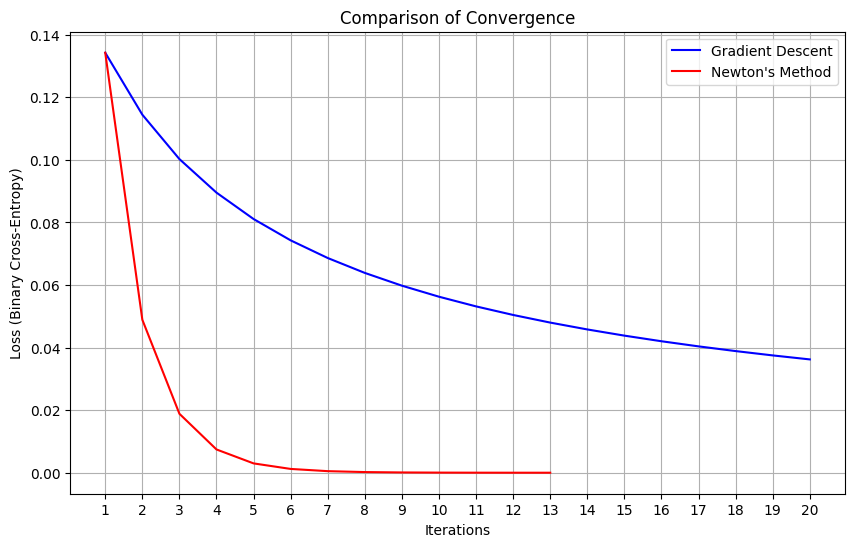

In [753]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations+1), loss_history_gradient, 'b-', label='Gradient Descent')
plt.plot(range(1, iterations+1), loss_history_newton, 'r-', label="Newton's Method")
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Comparison of Convergence')
plt.legend()
plt.grid(True)

plt.xticks(range(1, iterations+1))

plt.show()

### Using a threshold to measure the number of iterations needed

In [754]:
def sigmoid(z):
    #define the sigmoid function
    return 1 / (1 + np.exp(-z))

def loss_calc(y, y_hat):
    # Binary Cross-Entropy Loss
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Add a column of ones to X (bias term)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X_b is now [1, feature1, feature2] with 2000 rows (2000x3 matrix)

# Initialize starting weights to 0.
w_grad = w_ini      #this is a 3x1 matrix

 #make y a column vector
y = y.reshape(-1, 1)

learning_rate = 0.1
max_iterations = 1000
threshold = 0.05

# store the loss for plotting
loss_history_gradient_2 = []

# Implement Batch Gradient Descent
for i in range(1,max_iterations+1):
    z = np.dot(X_b, w_grad)
    y_hat = sigmoid(z)      #this is a 2000x1 matrix

    # store the loss
    loss = loss_calc(y, y_hat)
    loss_history_gradient_2.append(loss)

    # Compute the gradients and update w
    gradient = np.dot(X_b.T, (y_hat - y)) / len(y)
    if(np.linalg.norm(gradient) < threshold):
      break
    w_grad = w_grad - learning_rate * gradient
print("Number of iterations = ",i)
print("Final GD weights:\n", w_grad.ravel())

Number of iterations =  54
Final GD weights:
 [0.05354325 0.95394756 0.73466275]


### Using validation datasets for early stopping

In [755]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_calc(y, y_hat):
    y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

from sklearn.model_selection import train_test_split

#split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Training data with bias
X_val_b = np.c_[np.ones((X_val.shape[0], 1)), X_val]        # Validation data with bias


w_grad = w_ini # this is a 3x1 matrix

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

learning_rate = 0.1
max_iterations = 1000  
no_improvement = 10          # How many iterations to wait after no improvement
tolerance = 0.001       

best_val_loss = np.inf   
best_weights = w_grad.copy() # Save a copy of the best weights
no_improvement_counter = 0     # Counter for how long we've waited without improvement

loss_history_gradient_3 = []
val_loss_history = [] # New list to track validation loss

# Batch Gradient Descent with Early Stopping
for i in range(max_iterations):
    # Use the TRAINING set to calculate gradient and update weights
    z_train = np.dot(X_train_b, w_grad)
    y_hat_train = sigmoid(z_train)

    train_loss = loss_calc(y_train, y_hat_train)
    loss_history_gradient_3.append(train_loss)

    gradient = np.dot(X_train_b.T, (y_hat_train - y_train)) / len(y_train)
    w_grad = w_grad - learning_rate * gradient

    # Use the validation dataset to checck the validation loss
    z_val = np.dot(X_val_b, w_grad)
    y_hat_val = sigmoid(z_val)
    current_val_loss = loss_calc(y_val, y_hat_val)
    val_loss_history.append(current_val_loss)

    if best_val_loss - current_val_loss > tolerance:
        best_val_loss = current_val_loss
        best_weights = w_grad.copy() # Save a copy of these best weights if the loss has reduced
        no_improvement_counter = 0         # Reset the counter
    else:
        # did not improve.
        no_improvement_counter += 1

    #check is there is no improvement for several iterations
    if no_improvement_counter >= no_improvement:
        print(f"\nEarly stopping triggered at iteration {i+1}")
        print(f"Best validation loss was {best_val_loss:.6f} at iteration {i+1 - no_improvement_counter}")
        # Revert our weights to the best ones we found
        w_grad = best_weights
        break

else:
    print(f"Max iterations: {max_iterations} reached.")

print("Final GD weights:\n", w_grad.ravel())


Early stopping triggered at iteration 102
Best validation loss was 0.010479 at iteration 92
Final GD weights:
 [0.02631071 1.07526056 0.82649732]


### Updating the blob centers

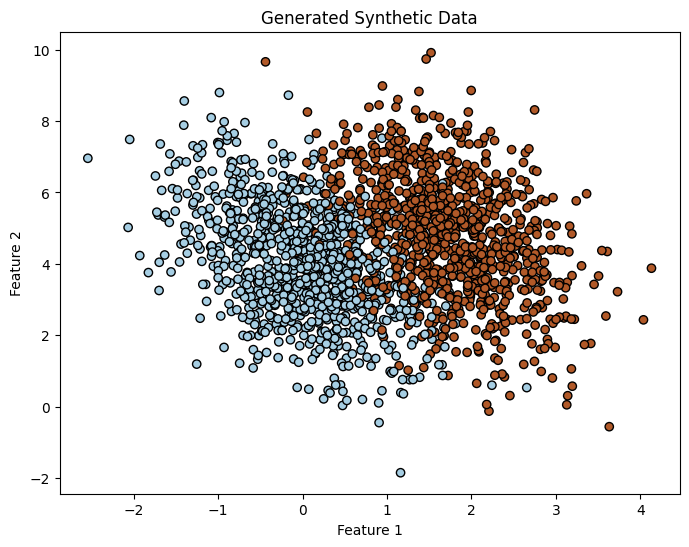

In [756]:
np . random . seed (0)
centers = [[ 2 , 2] , [5 , 1.5]]

#make blobs around the centers. X is 2000x2 matrix and y is a 2000, matrix. y is 0 or 1 depending on the center
X , y = make_blobs ( n_samples =2000 , centers = centers , random_state =5)

#transform X using the following matrix
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np.dot(X , transformation )

#visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Generated Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### Calculate the Loss and Weights for the new blobs

In [757]:
def sigmoid(z):
    #define the sigmoid function
    return 1 / (1 + np.exp(-z))

def loss_calc(y, y_hat):
    # Binary Cross-Entropy Loss
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Add a column of ones to X (bias term)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X_b is now [1, feature1, feature2] with 2000 rows (2000x3 matrix)

# Initialize starting weights to 0.
w_grad = w_ini      #this is a 3x1 matrix

 #make y a column vector
y = y.reshape(-1, 1)

learning_rate = 0.1
iterations = 20

# store the loss for plotting
loss_history_gradient_new = []

# Implement Batch Gradient Descent
for i in range(iterations):
    z = np.dot(X_b, w_grad)
    y_hat = sigmoid(z)      #this is a 2000x1 matrix

    # store the loss
    loss = loss_calc(y, y_hat)
    loss_history_gradient_new.append(loss)

    # Compute the gradients and update w
    gradient = np.dot(X_b.T, (y_hat - y)) / len(y)
    w_grad = w_grad - learning_rate * gradient

print("Final GD weights:\n", w_grad.ravel())

Final GD weights:
 [-0.06405436  0.8672853  -0.0861103 ]


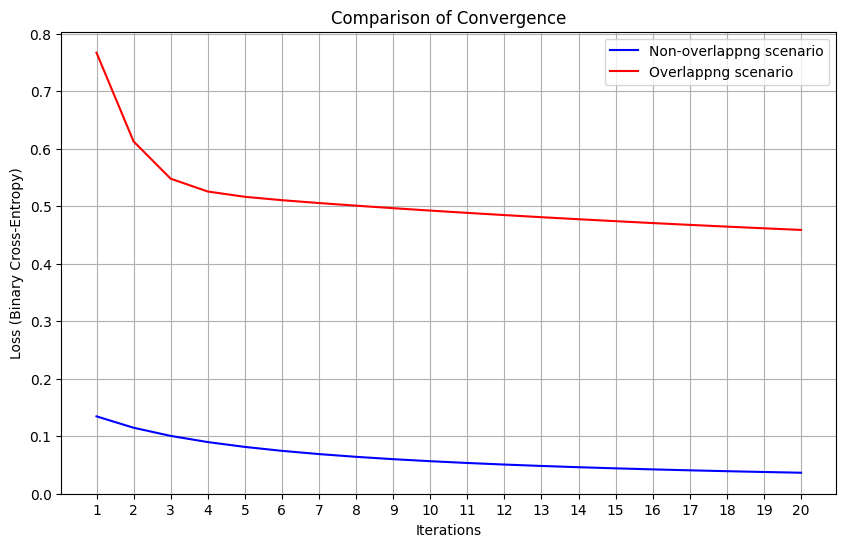

In [758]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations+1), loss_history_gradient, 'b-', label='Non-overlappng scenario')
plt.plot(range(1, iterations+1), loss_history_gradient_new, 'r-', label="Overlappng scenario")
plt.xlabel('Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Comparison of Convergence')
plt.legend()
plt.grid(True)

plt.xticks(range(1, iterations+1))

plt.show()